# Сборный проект 1

Цель исследования - нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Исходные данные: Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

## Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from scipy import stats as st
#import math


df = pd.read_csv('/datasets/games.csv')
df.info(); df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Описание данных

Данные представлены 1 датасетом, в котором есть 11 столбцов, макс. кол-во строк - 16715. При этом 5 столбцов типа object, остальные - вещественные (float64):

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Вывод по исходным данным:

В столбцах замечено разное количество значений, это сигнализирует о наличии пропусков, кроме того, есть несоответствия типов данных в некоторых столбцах.

 ## Подготовка данных

 ### Заменим названия столбцов (приведем к нижнему регистру);

In [2]:
df.columns = df.columns.str.lower() # приведение столбцов к нижнему регистру
# df.columns = [x.lower() for x in df.columns]  # можно и так
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

### Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;

#### преобразуем тип данных в столбце year_of_release

In [3]:

#display(df['year_of_release'].unique())

# чтобы преобразовать столбец year_of_release в Int, для начала нужно заполнить 
# пропуски - заполняем их медианами, т.к. это меньше всего исказит данные
display(df['year_of_release'].isna().sum()) # 269 пропусков   
df.loc[df['year_of_release'].isna() == True, 'year_of_release'] = df['year_of_release'].median() #пропусков всего 1,6% (269 шт) -
# можно заменить на медианы
#display(df['year_of_release'].unique())
display(df['year_of_release'].isna().sum()) # 0 пропусков
# теперь преобразуем тип данных для столбца year_of_release: 
df['year_of_release'] = df['year_of_release'].astype(int) # для года выпуска игры, очевидно, больше подойдет формат целых чисел
df.info()


269

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### преобразуем тип данных в столбце critic_score

In [5]:

display(df['critic_score'].unique()) # нулей среди значений нет, поэтому пропуски можно заменить на нули \
# (а какие-нибудь значения нужны, чтобы перевести весь столбец в тип Integer ) 

display(df['critic_score'].value_counts())
#display(df['critic_score'].median())
#df.loc[df['critic_score'].isna() == True, 'critic_score'] = df['critic_score'].median() # пропусков слишком много,
# на мой взгляд, нецелесообразно заменять их на медианное значение, поэтому заменим их на нули (т.е. рейтинг не определен)

df.loc[df['critic_score'].isna() == True, 'critic_score'] = 0
display(df['critic_score'].unique())

df['critic_score'] = df['critic_score'].astype('int')   # столбец оценки критиков содержит только целые значения, 
# поэтому можно преобразовать в Int
df.info()



array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
29.0      3
13.0      1
22.0      1
17.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


#### преобразуем тип данных в столбце user_score

In [6]:
# 2.2.3 преобразуем дип данных в столбце user_score

display(df['user_score'].unique()) # очевидно, нужно привести тип данных к float. 
display(df['user_score'].isna().sum()) # всего 6701 пропусков - слишком много для того, чтобы их заменять медианным значением
# на нули тоже не будем их менять, т.к. в столбцах уже есть нулевые значения. В общем, оставим пропуски как есть

#tbd (to be determined - значение еще не определено, это аналог nan) не можем заменить на нули (т.к. они уже есть среди значений), 
# т.к. это аналог nan, заменим значения tbd на nan:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan 
display(df['user_score'].isna().sum())
display(df['user_score'].unique())
#df.loc[df['user_score'].isna() == True, 'user_score'] = df['user_score'].median() # слишком много пропусков для замены на медиану

df['user_score'] = df['user_score'].astype('float') # преобразуем тип данных в float, т.к. столбец содержит 
# вещественные числa
df.info()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

6701

9125

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


#### проверим дубликаты

In [7]:
display(df.duplicated().sum()) # дубликатов нет

df['platform'].unique() # вроде неявных дубликатов нет, хотя кто знает что такое DC, возможно, его нужно будет 
                        #переименовать в DS

0

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Обработаем пропуски. 
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;

In [9]:
# заменяем пропуски в столбце name:

display(df[df['name'].isna() == True])
df.loc[df['name'].isna() == True, 'name'] = 'noname'
#display(df['name'].value_counts())
#display(df.info())
#display(df[df['name'] == 'FIFA 14'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,NaN,NaN


In [10]:
# заменяем пропуски в столбце genre:

display(df[df['genre'].isna() == True])
df.loc[df['genre'].isna() == True, 'genre'] = 'undetermined'
df['genre'].unique()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,noname,GEN,1993,NaN,1.78,0.53,0.00,0.08,0,NaN,NaN
14244,noname,GEN,1993,NaN,0.00,0.00,0.03,0.00,0,NaN,NaN


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'undetermined'], dtype=object)

In [12]:

df['rating'].unique() # в этом столбце есть пропуски, заменим их на 'unrated', т.к. рейтинг не был присвоен
display(df['rating'].isna().sum())
#df.loc[df['rating'].isna() == True, 'rating'] = 'unrated' # можно и так
df['rating'] = df['rating'].fillna('unrated')

df['rating'].unique()

6766

array(['E', 'unrated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

**<font color="blue">Визуализируем пропуски:</font>**

In [13]:
#pip install missingno - почему-то не загружается здесь, соответственно, весь модуль не работает
#import missingno as msno
#msno.matrix(dа, labels=True)
#msno.bar(df)
#msno.bar(df)

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [14]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head() # появился новый столбец, содержащий суммарный объем продаж

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,unrated,31.38


<font color="blue">Промежуточный вывод:
На этом этапе данные были подготовлены для анализа:
* названия столбцов приведены к нижнему регистру;
* преобразованы типы данных в столбцах year_of_release, сritic_score, user_score;
* проверено наличие дубликатов;
* обработано пропуски (там, где это возможно); 
* добавлен новый столбец с суммарными продажами, который будет нужен для дальнейшего анализа. </font>

## Проведем исследовательский анализ данных

 ### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Text(0, 0.5, 'Количество выпущенных игр')

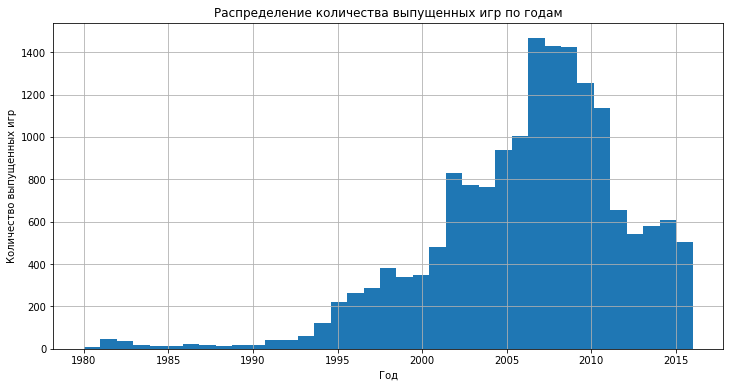

In [15]:
df['year_of_release'].hist(bins = 37, figsize=(12,6), range = (1980, 2016))
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр')

count    16715.000000
mean      2006.492911
std          5.829925
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

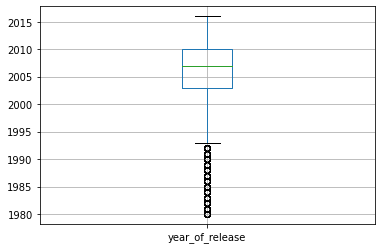

In [16]:
df.boxplot(column = 'year_of_release')
df['year_of_release'].describe()

Очевидно, что данные до 1994 года - это выбросы с точки зрения общего количества выпущенных игр по годам. Это может объясняться тем, что раньше игр в принципе выпускалось гораздо меньше, с развитием технологий (персональные компьютеры, интернет) игр стало выпускаться больше.

С другой стороны, гистограмма показывает, что, начиная с 2009 года количество выпускаемых игр уменьшается - это может объясняться тем, что игры становятся сложнее технически (больше графики и т.д.) и поэтому готовятся дольше и в меньшем объеме. 

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним за какой характерный срок появляются новые и исчезают старые платформы.

,sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Text(0.5, 0, 'Суммарные количество продаж, млн шт')

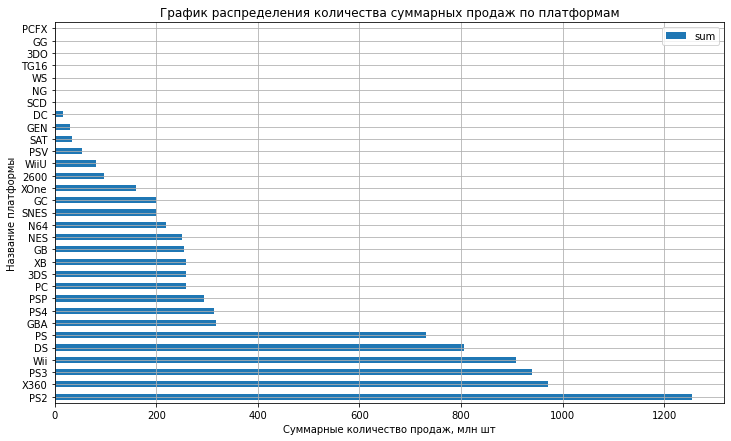

In [17]:
platform_sums =    df.pivot_table(index='platform', values='sum_sales', aggfunc=['sum'])
platform_sums.columns = ['sum']
platform_sums = platform_sums.sort_values(by = 'sum', ascending = False)
display(platform_sums.head(10))

platform_sums.plot(kind = 'barh', grid=True, figsize=(12, 7))
plt.title('График распределения количества суммарных продаж по платформам')
plt.ylabel('Название платформы')
plt.xlabel('Суммарные количество продаж, млн шт')


Вывели все продажи, выяснили топ-10 платформ по количеству суммарных продаж миллионов копий. Теперь Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [18]:
#platforms_top10=['PS2','X360','PS3','Wii','DS','PS','GBA','PS4','PSP','PC']
#df_top10_platforms=df.query('platform in @platforms_top10')

count = platform_sums.head(10)
df_top10 = df[df['platform'].isin(count.index)] # сохраняем в новый датафрейм данные только топ-10 платформ                                                            #с наибольшим кол-вом объявлений 

df_top10.head(); df_top10.info()
# сделали отдельный датафрейм с топ-10 платформами

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12819 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             12819 non-null  object 
 1   platform         12819 non-null  object 
 2   year_of_release  12819 non-null  int64  
 3   genre            12819 non-null  object 
 4   na_sales         12819 non-null  float64
 5   eu_sales         12819 non-null  float64
 6   jp_sales         12819 non-null  float64
 7   other_sales      12819 non-null  float64
 8   critic_score     12819 non-null  int64  
 9   user_score       6025 non-null   float64
 10  rating           12819 non-null  object 
 11  sum_sales        12819 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.3+ MB


In [19]:
top10_aggregated = df_top10.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
top10_aggregated.head()

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# можно и так
#plt.figure(figsize=(15,12))
#grafik = sb.lineplot(data = top10_aggregated, dashes = False)

#plt.legend(title='Платформы:')
#plt.title('Распределение выпущенных игр с наибольшими суммарными продажами (шт) по годам', fontsize=12)
#plt.xlabel("Года", fontsize=12)
#plt.ylabel("Кол-во выпущенных игр, млн шт", fontsize=12)
#plt.show()

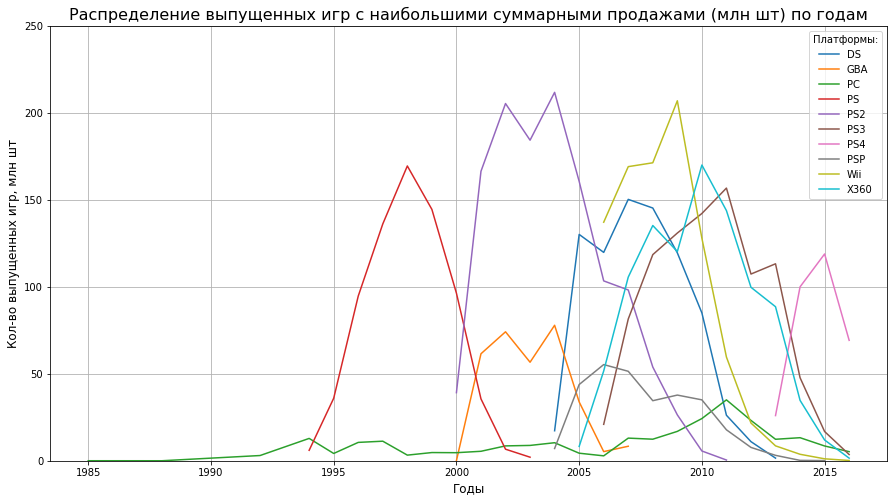

In [21]:
#top10_aggregated.info()
plot = top10_aggregated.plot(y=top10_aggregated.columns, style='-', ylim=(0, 250), grid=True, figsize=(15, 8))
plt.legend(title='Платформы:')
plt.title('Распределение выпущенных игр с наибольшими суммарными продажами (млн шт) по годам', fontsize=16)
plt.xlabel("Годы", fontsize=12)
plt.ylabel("Кол-во выпущенных игр, млн шт", fontsize=12)
plt.show()

судя по графику, характерный срок жизни платформы - около 10-11 лет:
* PS - 1993-2003, 
* PS2 - 2000-2010, 
* DS - 2004-2013, 
* Wii - 2006 - 2016, 
* PS3 - 2006 -2016, 
* X360 - 2005- 2016 
* PSP - 2004 - 2014
* PS3 - 2006 -2016
* GBA - 2000 - 2007 - исключение, прожила 8 лет
* PC - 1985 - 2016 - исключение, актуальна во все времена (т.к. это персональный компьютер)

График показывает, что жизненный цикл почти всех платформ закончился/заканчивается. В 2013 году появилась PS4 и, по идее, должна находиться в расцвете своих сил - наращивать продажи, но этого не происходит (пик уже пройден). Это может говорить о двух вещах:
- данные за 2016 год неполные и на самом деле PS4 демонстрирует восходящий тренд;
- данные за 2016 год актуальные, пик для PS4 действительно пройден, это говорит об ускорении ЖЦ платформ в условиях развития технологий.

Кроме того, стоит отметить, что в датасет могли не войти иные данные, например, по играм для мобильных телефонов, играм с доп. оборудованием (VR-очками и т.д.). Учитывая, что ЖЦ почти всех платформ закончен/заканчивается, стоило бы поискать новые направления/платформы или ожидать их появления в ближайшем будущем. 


### Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

На мой взгляд, при выборе актуального периода, который позволит корректно дать прогноз на 2017 год, не стоит опираться на данные предыдущего графика, т.к. он содержит данные топ-10 платформ "за все время наблюдений" - практически все вошедшие в график платформы уже заканчивают свой ЖЦ (а вошли они туда за счет своих былых продаж в предыдущие годы, не имеющих отношения к настоящему моменту). 

Поэтому, необходимо взять другой период, например, за последние пару-тройку лет (например, с 2014 года) - это позволит очистить датасет от данных старых умирающих платформ, и возможно, покажет новые развивающиеся платформы, которые еще не набрали тот объем продаж, который бы позволил им конкурировать с топами на всем временном промежутке. 

### Не будем учитывать в работе данные за предыдущие годы.

In [22]:
df_2014 = df.query('year_of_release >=2014')
df_2014.head(10)
df_2014['platform'].unique() # топ-10 из них выбирать не нужно, т.к. их осталось всего 10

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

### Выясним какие платформы лидируют по продажам, какие растут, какие падают. Выберем несколько потенциально прибыльных платформ.

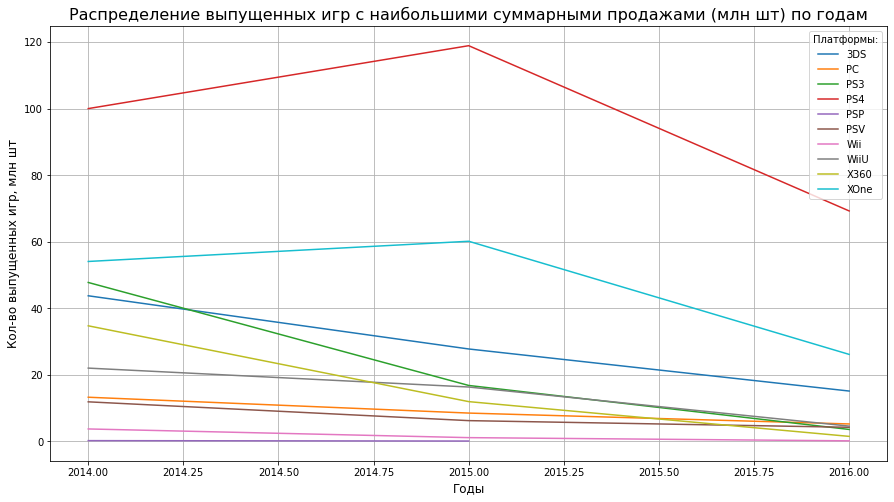

In [23]:
# агрегируем по платформам и суммам продаж, но уже с 2014 года:
aggregated_2014 = df_2014.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')

# построим тот же график распределения по годам, но уже с 2014 года:
plot = aggregated_2014.plot(y=aggregated_2014.columns, style='-', grid=True, figsize=(15, 8))
plt.legend(title='Платформы:')
plt.title('Распределение выпущенных игр с наибольшими суммарными продажами (млн шт) по годам', fontsize=16)
plt.xlabel("Годы", fontsize=12)
plt.ylabel("Кол-во выпущенных игр, млн шт", fontsize=12)
plt.show()

Если считать данные за 2016 год полными, то, судя по графику, количество продающихся копий игр падает для любой платформы по-сравнению с 2014 годом.Еще раз, это может говорить о 2-х вещах:
* индустрия развивается в каком-то другом направлении (например, мобильных игр или распространения бесплатных игр с рекламой, в этом датасете идет речь только о продающихся играх) и стоит обратить на это внимание;
* само количество выпускаемых игр становится меньше из-за все повышающихся требований к качеству (графике, сюжету и проч.) и увеличения времени их разработки - поэтому снижается ассортимент, а соответственно, и продажи.

Тем не менее, можно отметить топ-3 потенциально прибыльные платформы:
1. PS4 - лидирует по количеству проданных копий во всех анализируемых годах с большим отрывом (от 70 до 120 млн проданных копий в год).
2. XOne - занимает 2-е место в каждом из 3-х периодов (от примерно 25 до 60 млн проданных копий).
3. 3DS - 3 итоговое место, хотя в 2014 году занимает 4 позицию (от примерно 15 до 45 млн в разбивке по годам).


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Насколько я понимаю, здесь речь идет уже не о данных с 2014 года, а об общем датасете и требуется увидеть какая(ие) платформы являются "выбросами", ошибкой эволюции индустрии.

count      31.000000
mean      287.603548
std       348.160256
min         0.030000
25%        23.360000
50%       200.040000
75%       304.095000
max      1255.770000
Name: sum, dtype: float64

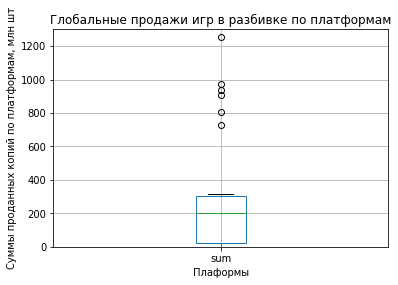

In [24]:
# то же самое делали в п. 3.2. - можно не повторять
#platform_sums =    df.pivot_table(index='platform', values='sum_sales', aggfunc=['sum'])
#platform_sums.columns = ['sum']
#platform_sums = platform_sums.sort_values(by = 'sum', ascending = False)
#display(platform_sums.head(10))

# а теперь построим боксплот по этом данным:
plt.ylim(0, 1300)
platform_sums.boxplot(column='sum')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Плаформы')
plt.ylabel('Суммы проданных копий по платформам, млн шт')
platform_sums['sum'].describe()

Ошибок эволюции (с т.з. графика - нижних выбросов) не найдено, а вот топ-6 лучших платформ, получается, являются выдающимися результатами (аномалиями), которые и являлись/являются лидерами рынка до сих пор с точки зрения общих продаж за всю историю наблюдений.

Теперь попробуем построить боксплот для каждой платформы по данным с 2014 года:

In [25]:
display(df_2014.head()) 



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,NaN,unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,NaN,unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,NaN,unrated,7.98


count     1689
unique      10
top        PS4
freq       376
Name: platform, dtype: object

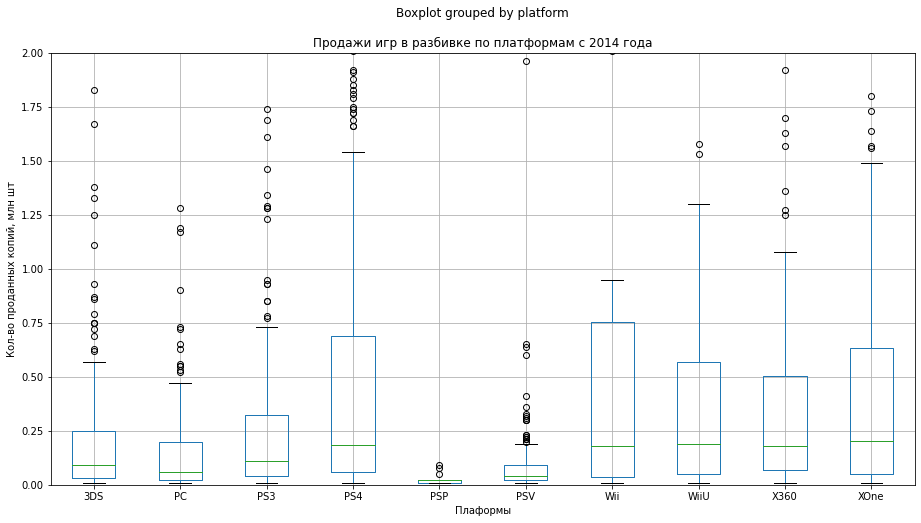

In [26]:
df_2014.boxplot(column = 'sum_sales', by = 'platform', figsize = (15, 8))
plt.ylim(0,2)
plt.title('Продажи игр в разбивке по платформам с 2014 года')
plt.xlabel('Плаформы')
plt.ylabel('Кол-во проданных копий, млн шт')
df_2014['platform'].describe()

count     1689
unique      10
top        PS4
freq       376
Name: platform, dtype: object

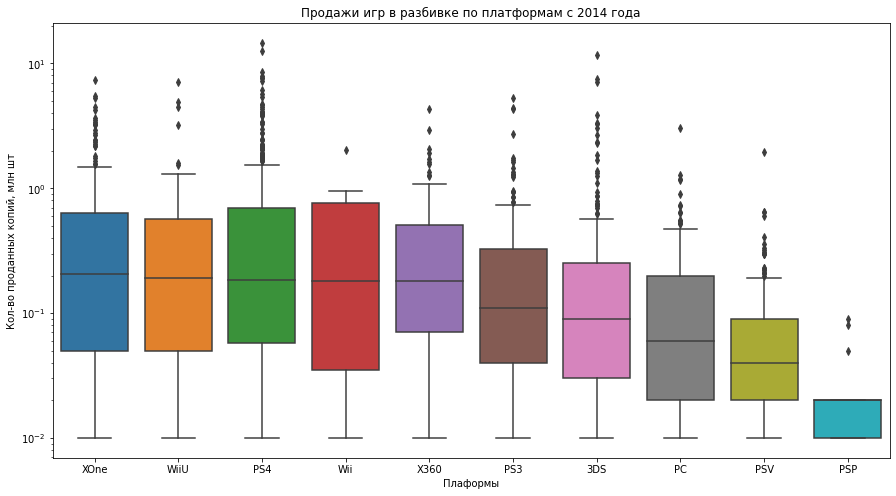

In [27]:
df_2014_order = df_2014.groupby('platform')['sum_sales'].agg('median').sort_values(ascending=False).index 
#отсортированные по медианам платформы
plt.figure(figsize=(15,8))
ax = sb.boxplot(data = df_2014, y='sum_sales', x='platform', order=df_2014_order)
ax.set(yscale="log") # чтобы увидеть все значения, нужен логарифмический масштаб по оси Y
#plt.ylim(0,3)

plt.title('Продажи игр в разбивке по платформам с 2014 года')
plt.xlabel('Плаформы')
plt.ylabel('Кол-во проданных копий, млн шт')
df_2014['platform'].describe()


<font color="blue">Этот график чуть меняет выводы о потенциально наиболее прибыльных платформах - судя по этому графику, это PS4, XOne и WiiU с самыми высокими значениями медиан. 
То есть, по-сравнению с графиком из п. 3.9, отражающим абсолютные суммы продаж, в топ-3 не вошла платформа 3DS, которая вошла в топ-3 по абсолютным суммам продаж, видимо, за счет отдельных суперуспешных игр (аномалий).</font> 
 

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Возьмем для анализа данные платформы PS4, как самой популярной платформы на текущий момент.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93,7.9,T,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77,3.4,M,4.47


-0.040131589472697356

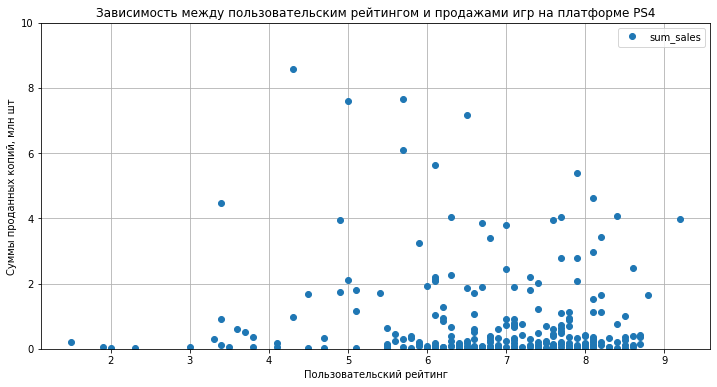

In [28]:
df_2014.head(10)
ps4_data = df_2014[df_2014['platform'] == 'PS4']
ps4_data = ps4_data[ps4_data['critic_score'] != 'nan'] # убираем значения nan  в столбце critic_score
ps4_data = ps4_data[~ps4_data['user_score'].isna()] #... и в столбце user_score
display(ps4_data.head(10))
ps4_data.plot(x='user_score', y='sum_sales', style='o', ylim=(0, 10), grid=True, figsize=(12, 6))
plt.title('Зависимость между пользовательским рейтингом и продажами игр на платформе PS4')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Суммы проданных копий, млн шт')
ps4_data['sum_sales'].corr(ps4_data['user_score'])

0.34140356191608023

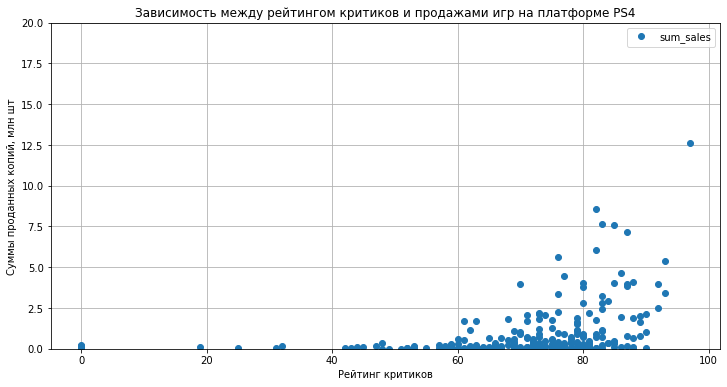

In [29]:
ps4_data.plot(x='critic_score', y='sum_sales', style='o', ylim=(0, 20), grid=True, figsize=(12, 6))
plt.title('Зависимость между рейтингом критиков и продажами игр на платформе PS4')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммы проданных копий, млн шт')
ps4_data['sum_sales'].corr(ps4_data['critic_score'])

Выводы: 
1. Корреляции между оценками пользователей и продажами нет совсем. 
2. Есть небольшая прямая корреляция (коэф. 0.34) между оценками критиков и продажами.

### Соотнесем выводы с продажами игр на других платформах.

Для этого посмотрим корреляцию на 2-х других топ-платформах - XOne и 3DS.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
398,Destiny,XOne,2014,Shooter,2.14,0.92,0.00,0.31,75,5.5,T,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82,7.5,M,3.28
417,FIFA 16,XOne,2015,Sports,0.89,2.12,0.00,0.24,84,4.4,E,3.25
422,Halo: The Master Chief Collection,XOne,2014,Shooter,1.91,1.00,0.03,0.29,85,7.2,M,3.23
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86,6.4,M,2.95


-0.0703839280647581

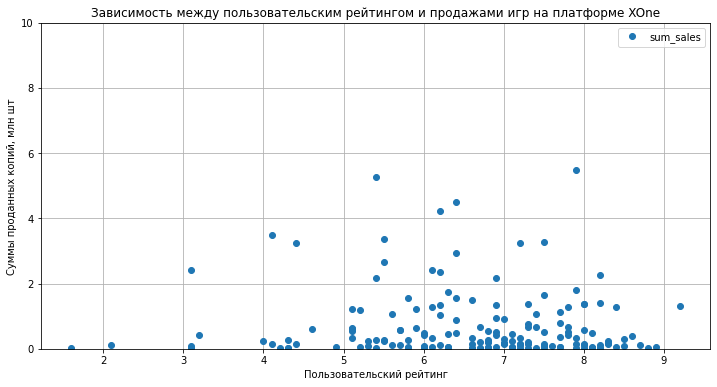

In [30]:
xone_data = df_2014[df_2014['platform'] == 'XOne']
xone_data = xone_data[xone_data['critic_score'] != 'nan'] # убираем значения nan  в столбце critic_score
xone_data = xone_data[~xone_data['user_score'].isna()] #... и в столбце user_score
display(xone_data.head(10))
xone_data.plot(x='user_score', y='sum_sales', style='o', ylim=(0, 10), grid=True, figsize=(12, 6))
plt.title('Зависимость между пользовательским рейтингом и продажами игр на платформе XOne')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Суммы проданных копий, млн шт')
xone_data['sum_sales'].corr(xone_data['user_score'])

0.375483996769959

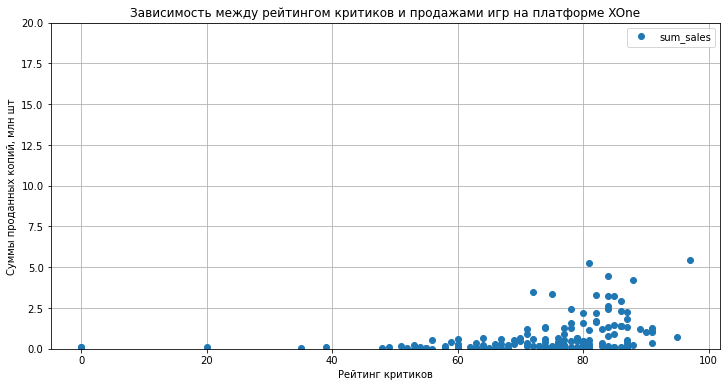

In [31]:
xone_data.plot(x='critic_score', y='sum_sales', style='o', ylim=(0, 20), grid=True, figsize=(12, 6))
plt.title('Зависимость между рейтингом критиков и продажами игр на платформе XOne')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммы проданных копий, млн шт')
xone_data['sum_sales'].corr(xone_data['critic_score'])

Касательно платформы XOne, ситуация с корреляцией практически такая же - нет зависимости между продажами и оценками пользователей, и есть, но небольшая (коэф. корреляции 0.37) между продажами и оценками критиков.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
312,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86,8.7,T,3.89
457,Animal Crossing: Happy Home Designer,3DS,2015,Simulation,0.51,1.02,1.40,0.12,66,6.9,E,3.05
677,The Legend of Zelda: Majora's Mask 3D,3DS,2015,Action,1.15,0.55,0.47,0.17,89,9.0,E10+,2.34
952,Kirby: Triple Deluxe,3DS,2014,Platform,0.61,0.34,0.79,0.09,80,8.8,E,1.83
1395,Yoshi's New Island,3DS,2014,Platform,0.48,0.53,0.28,0.09,64,6.1,E,1.38
1596,Pokemon Super Mystery Dungeon,3DS,2015,Role-Playing,0.48,0.35,0.34,0.08,69,8.8,E,1.25
1817,The Legend of Zelda: Tri Force Heroes,3DS,2015,Action,0.53,0.33,0.17,0.08,73,7.6,E,1.11
2219,Kirby: Planet Robobot,3DS,2016,Action,0.28,0.14,0.47,0.04,81,8.7,E,0.93
2839,Persona Q: Shadow of the Labyrinth,3DS,2014,Role-Playing,0.34,0.07,0.27,0.04,83,8.1,M,0.72
2946,The LEGO Movie Videogame,3DS,2014,Action,0.28,0.31,0.05,0.05,0,5.4,E10+,0.69


0.2151932718527028

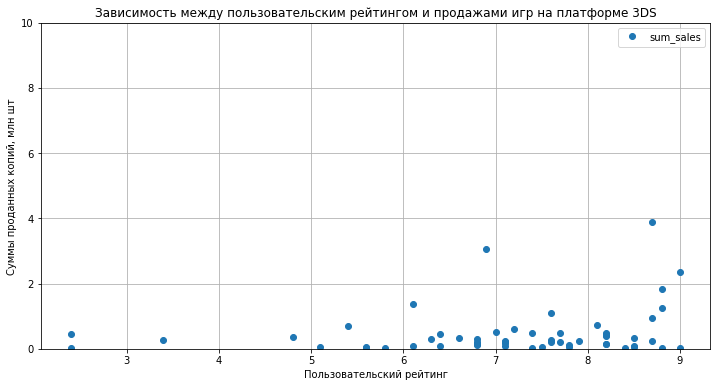

In [32]:
_3ds_data = df_2014[df_2014['platform'] == '3DS']
_3ds_data = _3ds_data[_3ds_data['critic_score'] != 'nan'] # убираем значения nan  в столбце critic_score
_3ds_data = _3ds_data[~_3ds_data['user_score'].isna()] #... и в столбце user_score
display(_3ds_data.head(10))
_3ds_data.plot(x='user_score', y='sum_sales', style='o', ylim=(0, 10), grid=True, figsize=(12, 6))
plt.title('Зависимость между пользовательским рейтингом и продажами игр на платформе 3DS')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Суммы проданных копий, млн шт')
_3ds_data['sum_sales'].corr(_3ds_data['user_score'])

0.19557926896687883

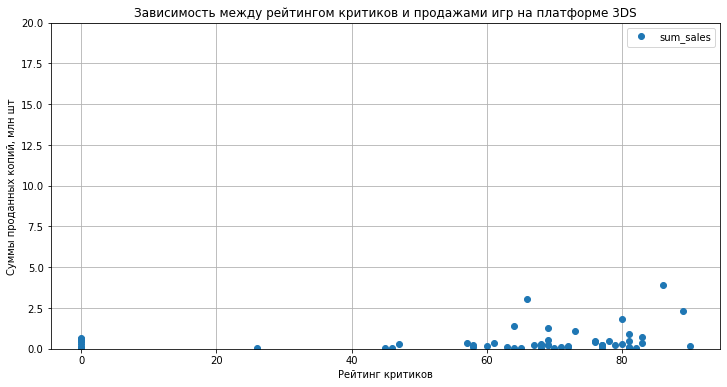

In [33]:
_3ds_data.plot(x='critic_score', y='sum_sales', style='o', ylim=(0, 20), grid=True, figsize=(12, 6))
plt.title('Зависимость между рейтингом критиков и продажами игр на платформе 3DS')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммы проданных копий, млн шт')
_3ds_data['sum_sales'].corr(_3ds_data['critic_score'])

С платформой 3DS ситуация несколько иная: оба параметра (оценки пользователей и оценки критиков) оказывают примерно одинаково (коэффициенты корреляции 0.21 и 0.19) слабое влияние на продажи.

### Посмотрим на общее распределение игр по жанрам: что можно сказать о самых прибыльных жанрах,  выделяются ли жанры с высокими и низкими продажами.

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.23,5.57,15.85,23.38,8.81,1.49,16.66,45.62,65.21,5.58,45.15,0.98
2015,72.02,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


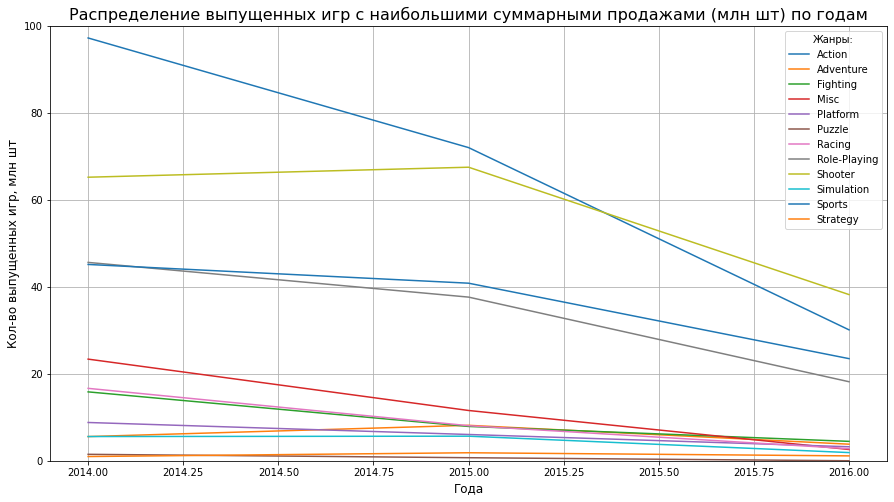

In [34]:
# агрегируем с 2014 года, но уже по жанрам и суммам продаж:
display(df_2014['genre'].unique())
aggr_genre_2014 = df_2014.pivot_table(index='year_of_release', columns='genre', values='sum_sales', aggfunc='sum')

display(aggr_genre_2014.head(10))
# построим тот же график распределения по годам, но уже с 2014 года:
plot = aggr_genre_2014.plot(y=aggr_genre_2014.columns, style='-', ylim=(0, 100), grid=True, figsize=(15, 8))
plt.legend(title='Жанры:')
plt.title('Распределение выпущенных игр с наибольшими суммарными продажами (млн шт) по годам', fontsize=16)
plt.xlabel("Года", fontsize=12)
plt.ylabel("Кол-во выпущенных игр, млн шт", fontsize=12)
plt.show()

C точки зрения абсолютных цифр (количества проданных копий игр) далеко впереди всех 4 жанра: Action, Shooter, Sports, Role_playing 

In [35]:
# отсортируем жанры по возрастанию медиан для наглядной визуализации на графике (используем в параметре "order")
display(df_2014.head(10)) 
df_2014_sorted_genre = df_2014.groupby('genre')['sum_sales'].agg('median').sort_values(ascending=True).index
display(df_2014_sorted_genre)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,NaN,unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,NaN,unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0,NaN,unrated,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,NaN,unrated,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,NaN,unrated,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Index(['Adventure', 'Puzzle', 'Strategy', 'Action', 'Misc', 'Racing',
       'Simulation', 'Role-Playing', 'Fighting', 'Platform', 'Sports',
       'Shooter'],
      dtype='object', name='genre')

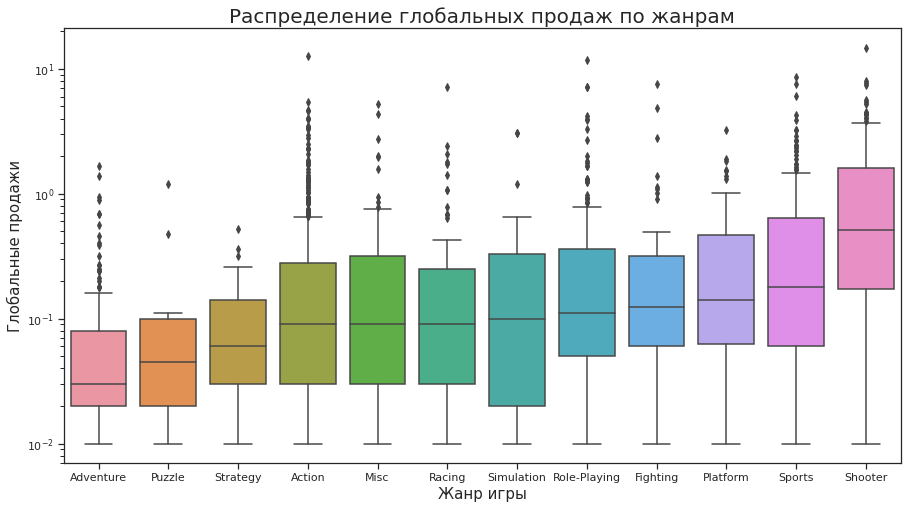

In [36]:

#display(aggr_genre_2014.columns) 
# columns_top10 = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', \
#       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
#display(columns_top10)
#df_2014.boxplot(y="sum_sales", x='genre', figsize = (15, 8))

plt.figure(figsize=(15, 8))
sb.set(style="ticks")
ax = sb.boxplot(data=df_2014, y = "sum_sales", x = 'genre', order = df_2014_sorted_genre)
ax.set_title('Распределение глобальных продаж по жанрам', fontsize=20)
ax.set_xlabel('Жанр игры', fontsize=15)
ax.set_ylabel('Глобальные продажи', fontsize=15)
ax.set(yscale="log")
plt.show()

Получается, жанры с самыми низкими продажами - Adventure, Puzzle, Strategy; жанры с самыми высокими продажами - Shooter, Sports, Platform. Для почти каждого жанра характерно большое количество выбросов /аномально высоких значений, за счет этого, например, в абсолютных числах жанр Role-Playing вышел на 4 место (а не на 5, если смотреть по медианам).

Что касается прибыльности жанров, то по исходным данным никаких выводов сделать в принципе нельзя, т.к. они не содержат информации о выручке от проданных игр, а только информацию о количестве проданных копий (нам неизвестны цены, по которым эти самые копии продавались).

## Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [37]:
na_2014 = df_2014.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', \
                                                                                              ascending = False).head(5)
na_2014

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [38]:
eu_sales = df_2014.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', \
                                                                                              ascending = False).head(5)
eu_sales

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [39]:
jp_sales = df_2014.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', \
                                                                                              ascending = False).head(5)
jp_sales

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


В Северной Америке и Европе на двух первых местах с большим отрывом PS4 и XOne, хотя разрыв между ними в Сев. Америке гораздо меньше, чем в Европе, где PS4 является наипопулярнейшей платформой. PS3 - еще одна платформа, вошедшая в топ-5 во всех регионах.

Платформа Х360 занимает по популярности 3 место Сев. Америке, но не вошла в топ-5 по другим регионам.
Платформа 3DS является лидером продаж в Японии с большим отрывом от PS4, здесь также в топ-5 присутствуют платформы PSV и WiiU, которых совсем нет в Европе и Америке. Следовательно, рынок в Японии самобытен (3DS на 1 месте, в топ-5 присутствуют PSV и WiiU), но не без корреляции с остальными регионами, т.к. в топ-5 есть PS3 и PS4.  	

сделаем по-другому то же, но не в абсолютных значениях, а в процентах, кроме того, в виде круговой диаграммы:

platform
PS4     34.714497
XOne    28.610153
X360     9.962684
3DS      7.970147
PS3      7.762445
WiiU     6.815462
PC       2.545237
PSV      0.887137
Wii      0.732240
Name: na_sales, dtype: float64

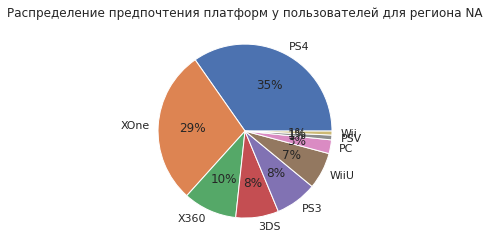

Самые популярные для региона NA платформы: ['PS4', 'XOne', 'X360', '3DS', 'PS3']


platform
PS4     48.041968
XOne    17.086597
PS3      9.435496
PC       6.638836
3DS      5.955372
X360     5.722625
WiiU     4.858135
PSV      1.304123
Wii      0.956849
Name: eu_sales, dtype: float64

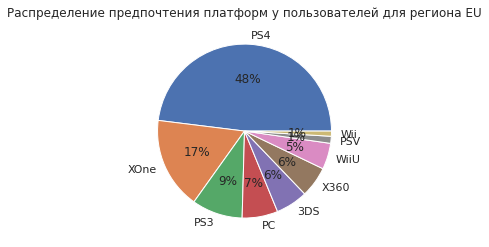

Самые популярные для региона EU платформы: ['PS4', 'XOne', 'PS3', 'PC', '3DS']


platform
3DS     47.523902
PS4     16.134923
PSV     15.619293
PS3     12.052852
WiiU     7.852616
PSP      0.386723
XOne     0.343753
X360     0.085938
Name: jp_sales, dtype: float64

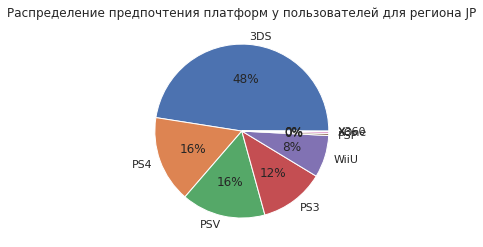

Самые популярные для региона JP платформы: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']


In [40]:
for r in ['na_sales', 'eu_sales', 'jp_sales']:
    t = (df_2014[df_2014[r]>0].groupby(by='platform')[r].sum() / df_2014[df_2014[r]>0][r].sum() *100).sort_values(ascending=False)
    display(t)
    
    plt.pie(t, labels = t.index.to_list(), autopct='%.0f%%')
    plt.title('Распределение предпочтения платформ у пользователей для региона ' + r.split('_')[0].upper())
    plt.show()
    print(f"Самые популярные для региона {r.split('_')[0].upper()} платформы: {t.index.to_list()[:5]}")

объединим прочие платформы (не топ-5) в один блок:

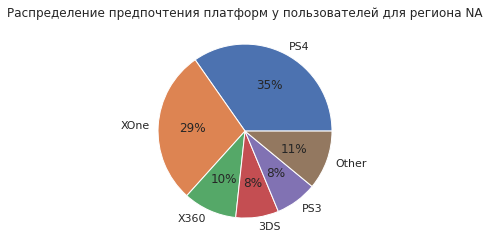

Самые популярные для региона NA платформы: ['PS4', 'XOne', 'X360', '3DS', 'PS3']


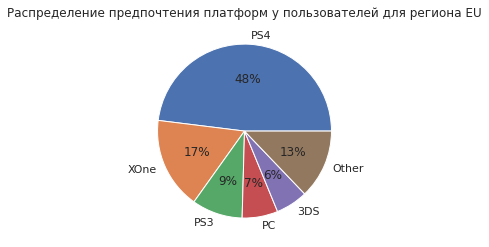

Самые популярные для региона EU платформы: ['PS4', 'XOne', 'PS3', 'PC', '3DS']


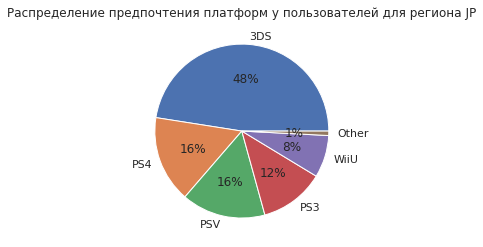

Самые популярные для региона JP платформы: ['3DS', 'PS4', 'PSV', 'PS3', 'WiiU']


In [41]:
for r in ['na_sales',	'eu_sales',	'jp_sales']:
    t = (df_2014[df_2014[r]>0].groupby(by='platform')[r].sum() / df_2014[df_2014[r]>0][r].sum() *100).sort_values(ascending=False)
    t.iloc[5] = t.iloc[5:].sum()
    t = t.drop(t.index[6:])
    t.index = ((t.index.tolist()[:5])+["Other"])    
    plt.pie(t, labels = t.index.to_list(), autopct='%.0f%%')
    plt.title('Распределение предпочтения платформ у пользователей для региона ' + r.split('_')[0].upper())
    plt.show()
    print(f"Самые популярные для региона {r.split('_')[0].upper()} платформы: {t.index.to_list()[:5]}")

### Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5). Поясним разницу.

In [42]:
top_genre = df_2014.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum')
top_genre

,na_sales,eu_sales,jp_sales
genre,,,
Action,72.53,74.68,29.58
Adventure,5.64,6.49,3.60
Fighting,12.43,6.69,6.37
Misc,15.05,12.86,5.61
Platform,6.79,6.80,2.69
Puzzle,0.65,0.52,0.93
Racing,8.74,14.13,1.76
Role-Playing,33.47,28.17,31.16
Shooter,79.02,65.52,4.87


In [43]:
na_top5_genre= top_genre.sort_values(by='na_sales',ascending=False).head(5).drop(['eu_sales','jp_sales'],axis=1)
eu_top5_genre= top_genre.sort_values(by='eu_sales',ascending=False).head(5).drop(['na_sales','jp_sales'],axis=1)
jp_top5_genre= top_genre.sort_values(by='jp_sales',ascending=False).head(5).drop(['eu_sales','na_sales'],axis=1)
display(na_top5_genre,eu_top5_genre,jp_top5_genre)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


4 самых популярных жанра совпадают для Сев. Америки и Европы (Shooter, Action, Sports, Role-Playing примерно на своих местах с почти одинаковыми долями продаж), различаются только 5 места - Misc для Сев. Америки, Racing - для Европы. В Японии свой лидер - Role-Playing, хотя в топ-5 жанров есть также и "американские" и "европейские" Action и Shooter. Добавились Fighting и Misc, а вот спортивные игры японцев не интересуют.

### Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [44]:
top_rating = df_2014.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum')
top_rating

,na_sales,eu_sales,jp_sales
rating,,,
E,50.74,58.06,8.94
E10+,33.23,26.16,4.46
M,96.42,93.44,8.01
T,38.95,34.07,14.78
unrated,64.72,58.95,56.90


* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет

Значительная часть проданных игр по тем или иным причинам не имела маркировки рейтинга ERSB (2 место в Сев. Америке и Европе и 1 место с большим отрывом в Японии), но если не учитывать игры без рейтинга, то можно сделать следующие выводы:
* самые большие продажи в Сев. Америке и Европе имеют игры с рейтингом M, почти вполовину меньше покупаются игры "для всех возрастов" и в 3 раза меньше - "для подростков" и "для детей от 10 лет".
* лучше всех в Японии продаются игры для подростков, чуть меньше (в 1,5 раза) игры для всех возрастов и только на третьем месте игры для взрослых (взрослые в Японии, видимо, работают, а не играют в игры).

## Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [45]:
# подготовим данные:
xone_df = df_2014[df_2014['platform'] == 'XOne']
xone_df = xone_df[~xone_df['user_score'].isna()]
display(xone_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014,Action,2.27,0.90,0.00,0.33,72,4.1,M,3.50
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,0,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01


In [46]:
pc_df = df_2014[df_2014['platform'] == 'PC']
pc_df = pc_df[~pc_df['user_score'].isna()]
display(pc_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.0,0.09,96,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014,Role-Playing,0.32,0.51,0.0,0.07,71,5.7,M,0.90
2784,Dragon Age: Inquisition,PC,2014,Role-Playing,0.33,0.34,0.0,0.06,85,5.9,M,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16456,Fallout Anthology,PC,2015,Action,0.00,0.01,0.0,0.00,0,8.3,unrated,0.01
16463,TrackMania Turbo,PC,2016,Action,0.00,0.01,0.0,0.00,79,6.8,E,0.01
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,0,1.4,E,0.01


Примем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза в этом случае: Средние пользовательские рейтинги платформ Xbox One и PC разные (неодинаковые).

In [47]:
alpha = 0.05 # примем уровень статистической значимости

# значений в выборках достаточно много, поэтому не берем метод для проверки по распределению Studentа
# берем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
# при этом считаем, что дисперсии равны, т.к. значений в выборках много 
results = st.ttest_ind(xone_df['user_score'], pc_df['user_score'], alternative='two-sided', equal_var= True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не получилось, поэтому есть основания полагать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [48]:
# подготовим данные:
action_df = df_2014[df_2014['genre'] == 'Action']
action_df = action_df[~action_df['user_score'].isna()]
display(action_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70,4.9,M,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
16544,Assassin's Creed Chronicles,XOne,2016,Action,0.00,0.01,0.00,0.00,0,6.8,T,0.01
16597,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65,6.0,M,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,unrated,0.01


In [49]:
sports_df = df_2014[df_2014['genre'] == 'Sports']
sports_df = sports_df[~sports_df['user_score'].isna()]
display(sports_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0,4.5,E,4.28
314,NBA 2K16,PS4,2015,Sports,2.49,0.66,0.03,0.69,87,6.7,E10+,3.87
...,...,...,...,...,...,...,...,...,...,...,...,...
16120,NBA 2K17,PC,2016,Sports,0.00,0.01,0.00,0.00,90,6.3,E,0.01
16142,MLB 15: The Show,PSV,2015,Sports,0.01,0.00,0.00,0.00,0,8.8,E,0.01
16146,Don Bradman Cricket 14,PS3,2014,Sports,0.00,0.01,0.00,0.00,73,6.9,E,0.01
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,0,1.4,E,0.01


Мы сравниваем 2 ген. совокупности на равенство, поэтому в случае, если они не равны, нулевая гипотеза будет подтверждена, и отвергнута, если средние будут равны:

Итак, нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны.

In [50]:
alpha = 0.05 # примем уровень статистической значимости

# значений в выборках достаточно много, поэтому не берем метод для проверки по распределению Studentа
# берем метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам:
# при этом считаем, что дисперсии равны, т.к. значений в выборках много 
results = st.ttest_ind(action_df['user_score'], sports_df['user_score'], alternative='two-sided', equal_var= True)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не может быть отвергнута, значит есть основания утверждать, что средние пользовательские рейтинги жанров Action и Sports разные.

##  Общий вывод.

Был проанализирован датасет с данными о количестве продаж игр по жнрам/платформам/территории с 1980 года. Предварительно данные были подготовлены для анализа (проведено преобразование типов данных там, где это необходимо, проверены пропуски, дубликаты). В результате:
1. Выявлен средний жизненный цикл платформы - 10 лет. В настоящее время (на конец 2016 года) большинство платформ самых крупных платформ (за все время наблюдений) заканчивают свой ЖЦ и следует ожидать новых платформ. Самая молодая платформа из топ-10  - PS4, она же демонстрирует самые высокие продажи.

2. Актуальный период выбран - с 2014 года, т.к. на этом отрезке мможно увидеть появление и развитие новых платформ, таких как XOne, 3DS и проч. 

3. Если считать данные за 2016 год полными, то количество продающихся копий игр падает для любой платформы по-сравнению с 2014 годом. Это может говорить о 2-х вещах:

* индустрия развивается в каком-то другом направлении (например, мобильных игр или распространения бесплатных игр с рекламой, в этом датасете идет речь только о продающихся играх) и стоит обратить на это внимание;
* само количество выпускаемых игр становится меньше из-за все повышающихся требований к качеству (графике, сюжету и проч.) и увеличения времени их разработки - поэтому снижается ассортимент, а соответственно, и продажи.
Тем не менее, можно отметить топ-3 потенциально прибыльные платформы:
PS4 - лидирует по количеству проданных копий во всех анализируемых годах с большим отрывом (от 70 до 120 млн проданных копий в год).
XOne - занимает 2-е место в каждом из 3-х периодов (от примерно 25 до 60 млн проданных копий).
3DS - 3 итоговое место, хотя в 2014 году занимает 4 позицию (от примерно 15 до 45 млн в разбивке по годам).

4. Для самой популярной платформы - PS4 - корреляции между оценками пользователей и продажами нет совсем, но есть небольшая прямая корреляция (коэф. 0.34) между оценками критиков и продажами.

    Касательно платформы XOne, ситуация с корреляцией практически такая же - нет зависимости между продажами и оценками пользователей, и есть, но небольшая (коэф. корреляции 0.37) между продажами и оценками критиков.

    С платформой 3DS ситуация несколько иная: оба параметра (оценки пользователей и оценки критиков) оказывают примерно одинаково (коэффициенты корреляции 0.21 и 0.19) слабое влияние на продажи.

5. Жанры с самыми низкими продажами - Adventure, Puzzle, Strategy; жанры с самыми высокими продажами - Shooter, Sports, Platform. Для почти каждого жанра характерно большое количество выбросов /аномально высоких значений, за счет этого, например, в абсолютных числах жанр Role-Playing вышел на 4 место (а не на 5, если смотреть по медианам).

    Что касается прибыльности жанров, то по исходным данным никаких выводов сделать в принципе нельзя, т.к. они не содержат информации о выручке от проданных игр, а только информацию о количестве проданных копий (нам неизвестны цены, по которым эти самые копии продавались).
    
6. Были определены топ-5 жанров для каждого из регионов (Вес.Америка, Европа, Япония). 4 самых популярных жанра совпадают для Сев. Америки и Европы (Shooter, Action, Sports, Role-Playing примерно на своих местах с почти одинаковыми долями продаж), различаются только 5 места - Misc для Сев. Америки, Racing - для Европы. 

    В Японии свой лидер - Role-Playing, хотя в топ-5 жанров есть также и "американские" и "европейские" Action и Shooter. Добавились Fighting и Misc, а вот спортивные игры японцев не интересуют. 

7. По поводу влияния рейтинга ERSB на продажи в отдельном регионе:

    Значительная часть проданных игр по тем или иным причинам не имела маркировки рейтинга ERSB (2 место в Сев. Америке и Европе и 1 место с большим отрывом в Японии), но если не учитывать игры без рейтинга, то можно сделать следующие выводы:

* самые большие продажи в Сев. Америке и Европе имеют игры с рейтингом M, почти вполовину меньше покупаются игры "для всех возрастов" и в 3 раза меньше - "для подростков" и "для детей от 10 лет".
* лучше всех в Японии продаются игры для подростков, чуть меньше (в 1,5 раза) игры для всех возрастов и только на третьем месте игры для взрослых (взрослые в Японии, видимо, работают, а не играют в игры).

8. Были проверены 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза подтвердилась.
* Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза так же подтвердилась.
